In [68]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
image_path='pointilism.jpeg'

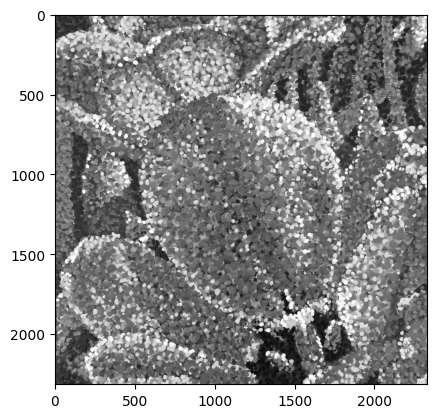

In [70]:
# Load the image
img = Image.open(image_path).convert('L')  # Convert to grayscale
plt.imshow(img,cmap='gray')
plt.show()

In [71]:
pixels = np.array(img)
pixels

array([[ 80,  79,  80, ..., 174, 188, 180],
       [ 82,  83,  85, ..., 189, 189, 184],
       [ 83,  85,  86, ..., 157, 153, 175],
       ...,
       [ 78,  78,  74, ..., 151, 149, 149],
       [ 91,  94,  71, ..., 144, 149, 150],
       [ 96,  96,  68, ..., 142, 149, 144]], dtype=uint8)

In [72]:
    # Apply median filtering
    filtered_pixels = np.zeros_like(pixels)
    filtered_pixels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [73]:
for i in range(1, pixels.shape[0] - 1):
    for j in range(1, pixels.shape[1] - 1):
        # Extract 3x3 neighborhood
        neighborhood = pixels[i-1:i+2, j-1:j+2]

        # Apply median filter
        median_value = np.median(neighborhood)
        filtered_pixels[i, j] = median_value

In [74]:
filtered_pixels

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  83,  85, ..., 178, 180,   0],
       [  0,  85,  86, ..., 157, 157,   0],
       ...,
       [  0,  78,  76, ..., 149, 149,   0],
       [  0,  78,  74, ..., 147, 149,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

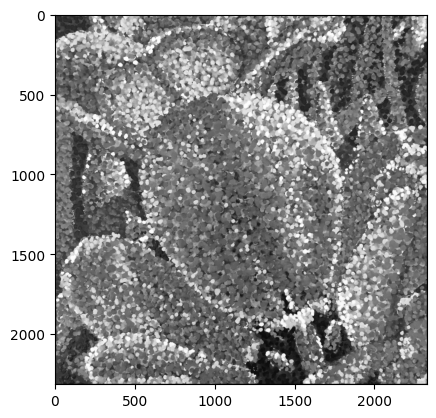

In [75]:
plt.imshow(filtered_pixels,cmap='gray')

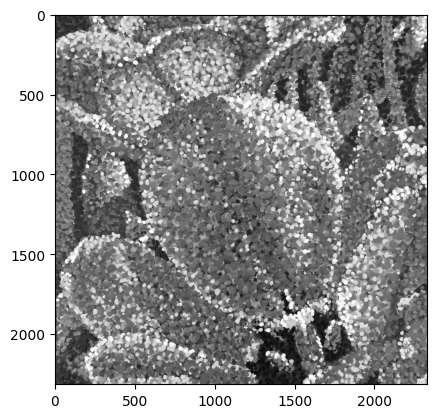

In [76]:
plt.imshow(img,cmap='gray')

In [77]:
#psnr
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_pixel_value = 255.0
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))

In [78]:
psnr(filtered_pixels,pixels)

37.84724248097524

In [79]:
def mse(original, processed):
    return np.mean((original - processed) ** 2)

In [80]:
mse(filtered_pixels,pixels)

10.674710673414774

In [81]:
import numpy as np
from PIL import Image

def median_filter(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(img)

    # Apply median filtering
    filtered_pixels = np.zeros_like(pixels)

    for i in range(1, pixels.shape[0] - 1):
        for j in range(1, pixels.shape[1] - 1):
            # Extract 3x3 neighborhood
            neighborhood = pixels[i-1:i+2, j-1:j+2]

            # Apply median filter
            median_value = np.median(neighborhood)
            filtered_pixels[i, j] = median_value

    # Display the original and filtered images
    Image.fromarray(pixels).show(title='Original Image')
    Image.fromarray(filtered_pixels).show(title='Median Filtered Image')

    return Image.fromarray(filtered_pixels)